# LGM Virtual Internship Program October Batch 2022

# Task3: Exploratory Data Analysis on Dataset- Terrorism

Level: Intermediate Level


Language: Python


Software: Jupyter Notebook

# Importing Libraries

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns


import warnings
warnings.filterwarnings("ignore")

In [45]:
gtr= pd.read_csv("C:\\Users\\Kmane\\globalterrorism.csv")
gtr.head(10)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
5,197001010002,1970,1,1,NaN,0,NaN,217,United States,1,...,"The Cairo Chief of Police, William Petersen, r...","""Police Chief Quits,"" Washington Post, January...","""Cairo Police Chief Quits; Decries Local 'Mili...","Christopher Hewitt, ""Political Violence and Te...",Hewitt Project,-9,-9,0,-9,NaN
6,197001020001,1970,1,2,NaN,0,NaN,218,Uruguay,3,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
7,197001020002,1970,1,2,NaN,0,NaN,217,United States,1,...,"Damages were estimated to be between $20,000-$...",Committee on Government Operations United Stat...,"Christopher Hewitt, ""Political Violence and Te...",NaN,Hewitt Project,-9,-9,0,-9,NaN
8,197001020003,1970,1,2,NaN,0,NaN,217,United States,1,...,The New Years Gang issue a communiqué to a loc...,"Tom Bates, ""Rads: The 1970 Bombing of the Army...","David Newman, Sandra Sutherland, and Jon Stewa...","The Wisconsin Cartographers' Guild, ""Wisconsin...",Hewitt Project,0,0,0,0,NaN
9,197001030001,1970,1,3,NaN,0,NaN,217,United States,1,...,"Karl Armstrong's girlfriend, Lynn Schultz, dro...",Committee on Government Operations United Stat...,"Tom Bates, ""Rads: The 1970 Bombing of the Army...","David Newman, Sandra Sutherland, and Jon Stewa...",Hewitt Project,0,0,0,0,NaN


RENAMING THE COLUMN NAMES

In [46]:
gtr.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [47]:
gtr.rename(columns={'iyear':'Year','imonth':'Month',
                    'iday':"day",'gname':'Group',
                    'country_txt':'Country','region_txt':'Region'
                    ,'provstate':'State','city':'City',
                    'latitude':'latitude',
    'longitude':'longitude','summary':'summary','attacktype1_txt':'Attacktype',
                    'targtype1_txt':'Targettype','weaptype1_txt':'Weapon'
                    ,'nkill':'kill','nwound':'Wound'},inplace=True)

In [48]:
gtr = gtr[['Year','Month','day','Country','State','Region',
           'City','latitude','longitude',"Attacktype",'kill',
               'Wound','target1','summary','Group','Targettype',
           'Weapon','motive']]

SHOWS FIRST NINE ROWS OF THE DATA

In [49]:
gtr.head()

,Year,Month,day,Country,State,Region,City,latitude,longitude,Attacktype,kill,Wound,target1,summary,Group,Targettype,Weapon,motive
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


# Exploratory Data Analysis

In [50]:
gtr.shape 

(181691, 18)

gtr.shape Shows the shape of the data variable in tuple format

In [51]:
gtr.isnull().sum() 

Year               0
Month              0
day                0
Country            0
State            421
Region             0
City             434
latitude        4556
longitude       4557
Attacktype         0
kill           10313
Wound          16311
target1          636
summary        66129
Group              0
Targettype         0
Weapon             0
motive        131130
dtype: int64

It Checks whether the dataset contains any null values

# Combining the data

In [53]:
gtr['Wound'] = gtr['Wound'].fillna(0)
gtr['kill'] = gtr['kill'].fillna(0)

In [54]:
gtr['Casualities'] = gtr['kill'] + gtr['Wound']

In [55]:
gtr.isnull().sum()

Year                0
Month               0
day                 0
Country             0
State             421
Region              0
City              434
latitude         4556
longitude        4557
Attacktype          0
kill                0
Wound               0
target1           636
summary         66129
Group               0
Targettype          0
Weapon              0
motive         131130
Casualities         0
dtype: int64

# Drop Columns

In [56]:
gtr.drop(['motive','summary','latitude','longitude'],axis=1,inplace=True)

for getting the info/summary of dataframe we use gtr.info()

In [57]:
gtr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 15 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   State        181270 non-null  object 
 5   Region       181691 non-null  object 
 6   City         181257 non-null  object 
 7   Attacktype   181691 non-null  object 
 8   kill         181691 non-null  float64
 9   Wound        181691 non-null  float64
 10  target1      181055 non-null  object 
 11  Group        181691 non-null  object 
 12  Targettype   181691 non-null  object 
 13  Weapon       181691 non-null  object 
 14  Casualities  181691 non-null  float64
dtypes: float64(3), int64(3), object(9)
memory usage: 20.8+ MB


gtr.describe() shows the statistical information

In [58]:
gtr.describe()

,Year,Month,day,kill,Wound,Casualities
count,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2002.638997,6.467277,15.505644,2.266860,2.883296,5.150156
std,13.259430,3.388303,8.814045,11.227057,34.309747,40.555416
min,1970.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,0.000000,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,0.000000,0.000000,1.000000
75%,2014.000000,9.000000,23.000000,2.000000,2.000000,4.000000
max,2017.000000,12.000000,31.000000,1570.000000,8191.000000,9574.000000


# Visualizing the data

In [59]:
attack = gtr.Country.value_counts()[:5]
attack

Iraq           24636
Pakistan       14368
Afghanistan    12731
India          11960
Colombia        8306
Name: Country, dtype: int64

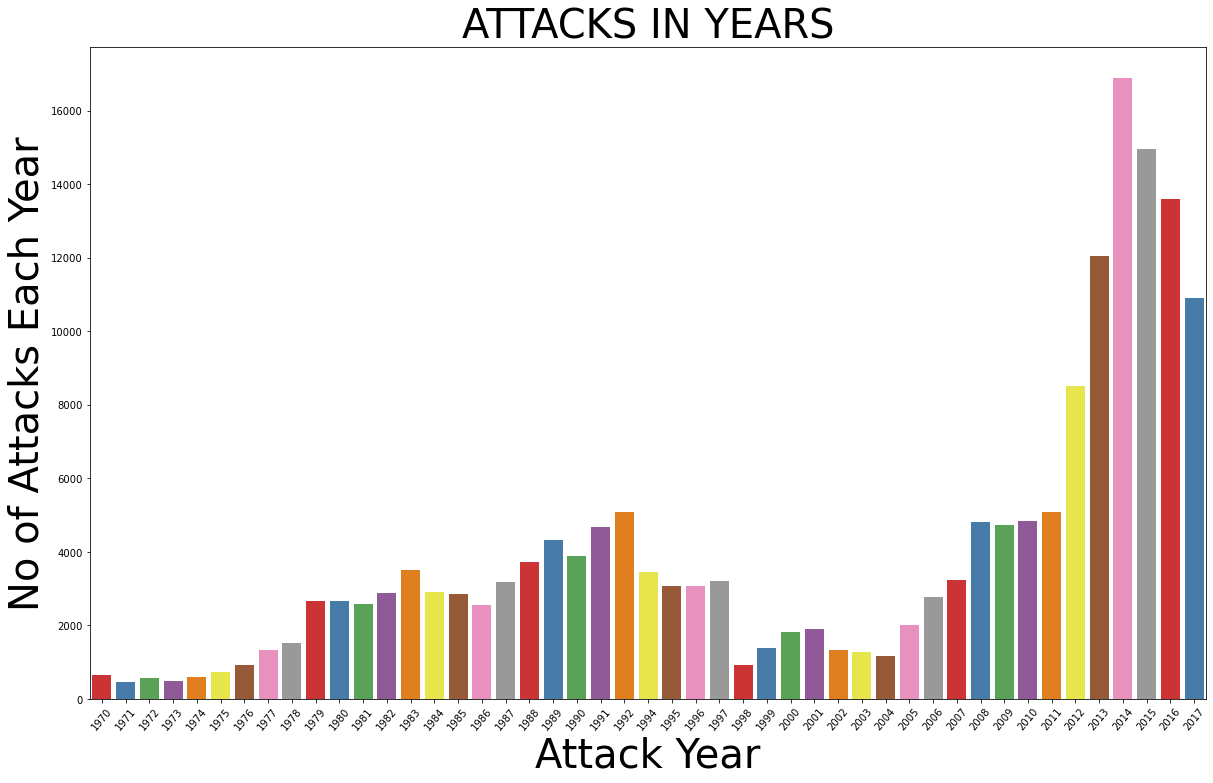

In [84]:
year = gtr['Year'].unique()
years_count = gtr['Year'].value_counts(dropna = False).sort_index()
plt.figure(figsize = (20,12))
sns.barplot(x = year,
           y = years_count,
           palette = "Set1")
plt.xticks(rotation = 50)
plt.xlabel('Attack Year',fontsize=40)
plt.ylabel('No of Attacks Each Year',fontsize=40)
plt.title('ATTACKS IN YEARS',fontsize=40)
plt.show()

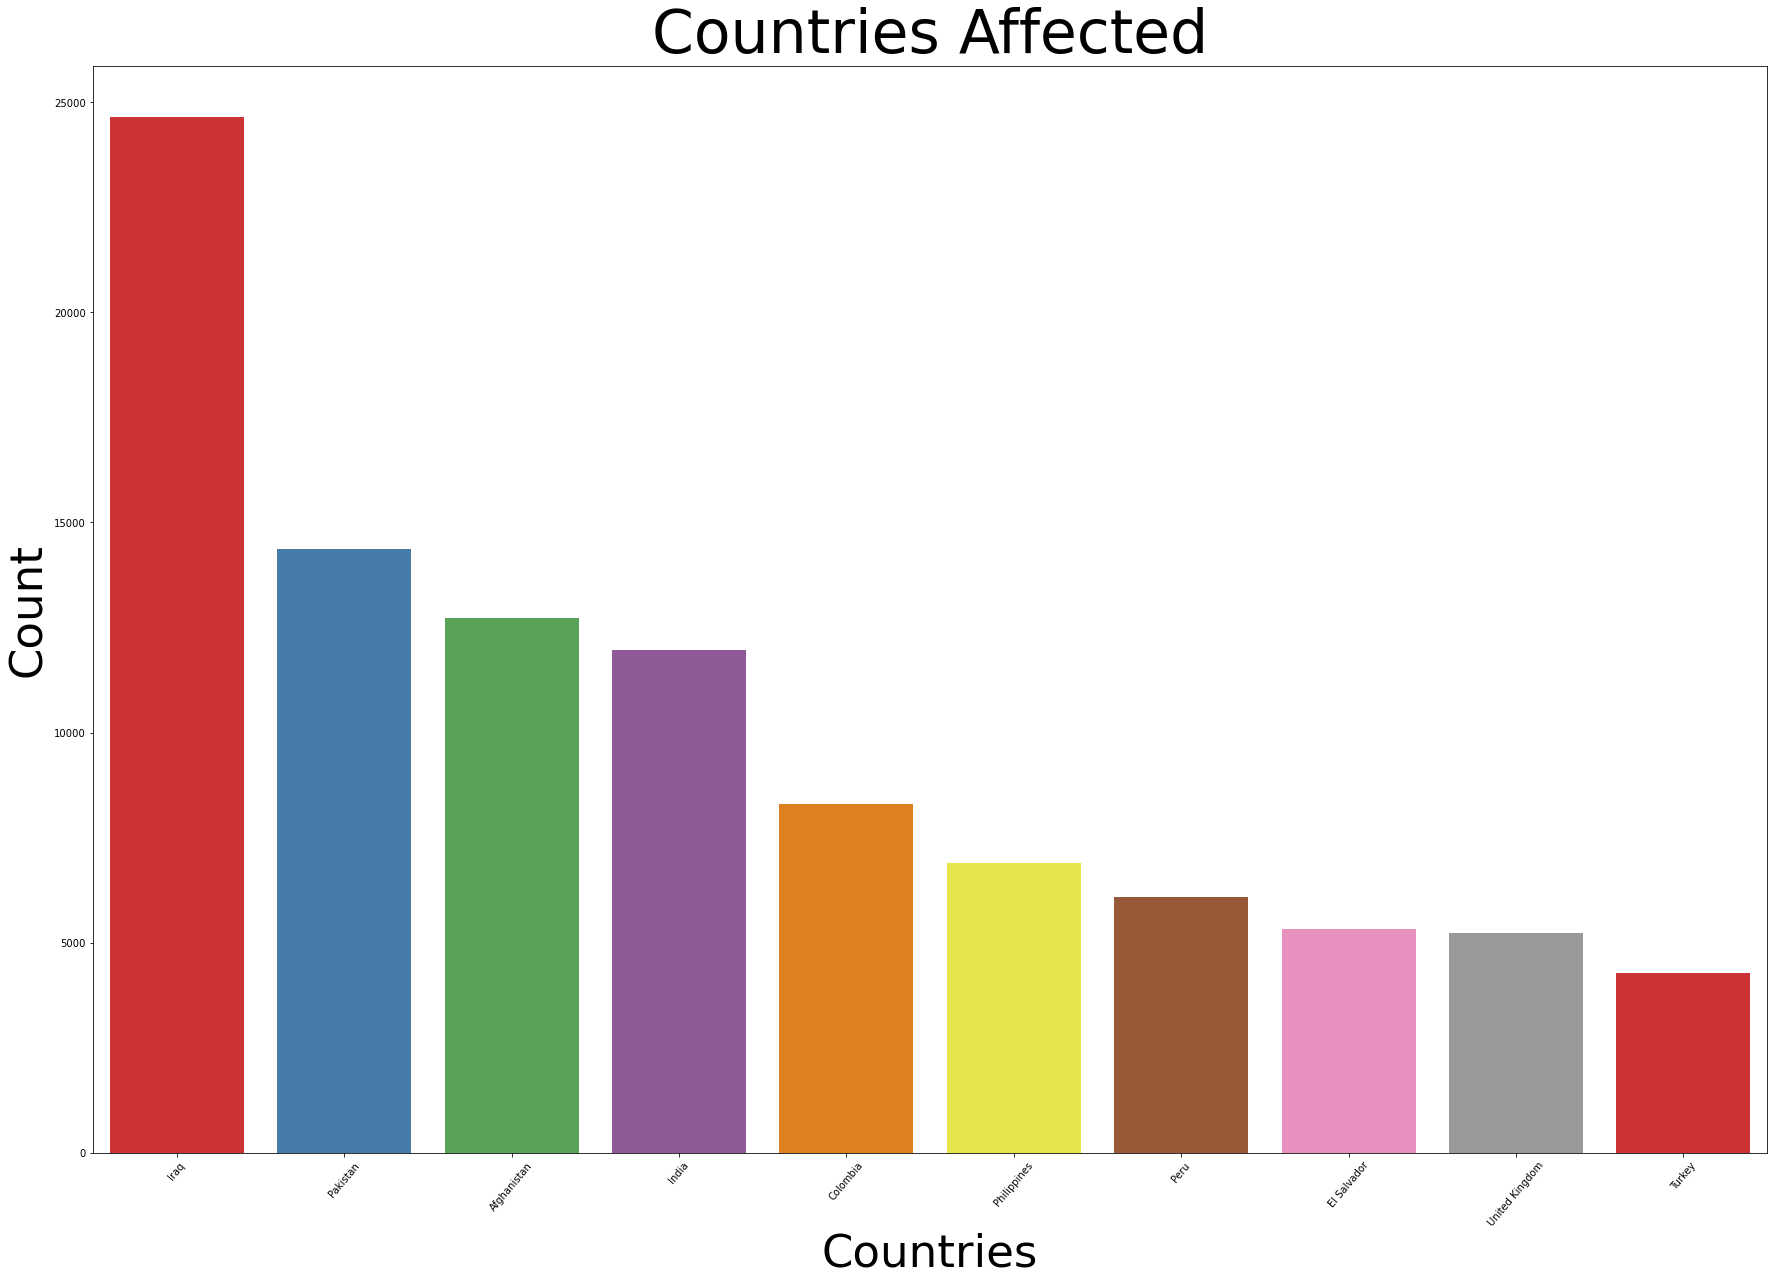

In [82]:
plt.subplots(figsize=(30,20))
sns.barplot(gtr['Country'].value_counts()[:10].index,gtr['Country'].value_counts()[:10].values,palette="Set1")
plt.title('Countries Affected',fontsize=60)
plt.xlabel('Countries',fontsize=45)
plt.ylabel('Count', fontsize=45)
plt.xticks(rotation = 50)
plt.show()

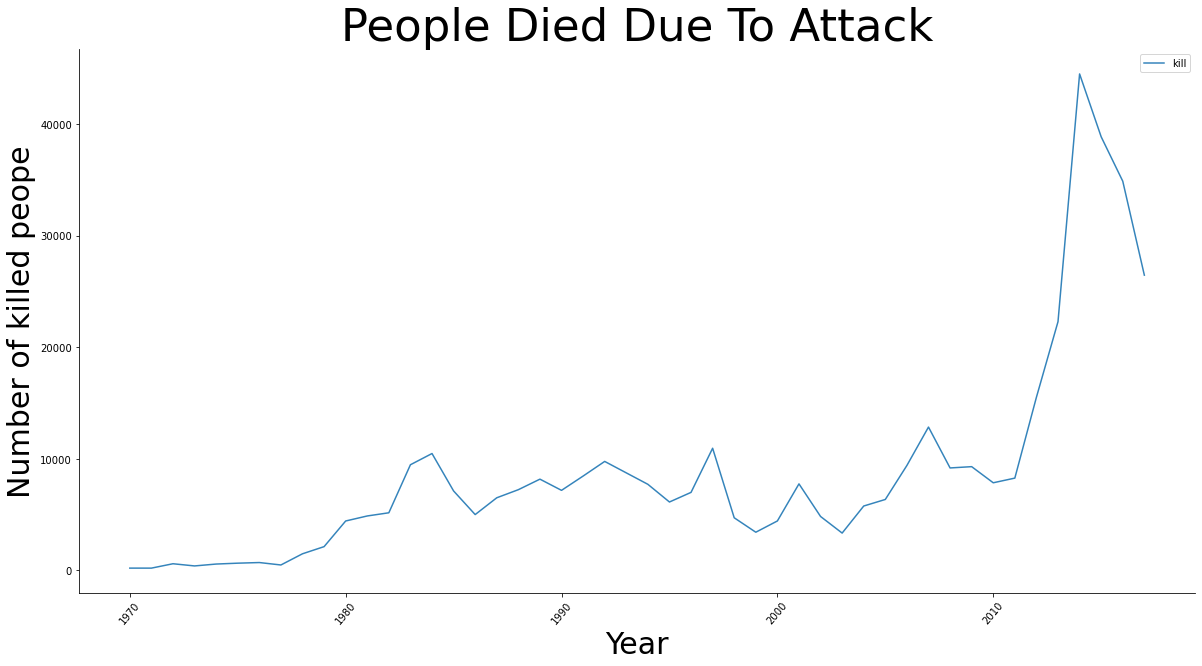

In [94]:
df = gtr[['Year','kill']].groupby(['Year']).sum()
fig, ax4 = plt.subplots(figsize=(20,10))
df.plot(kind='line',alpha=0.9,ax=ax4)
plt.xticks(rotation = 50)
plt.title("People Died Due To Attack",fontsize=45)
plt.ylabel("Number of killed peope",fontsize=30)
plt.xlabel('Year',fontsize=30)
top_side = ax4.spines["top"]
top_side.set_visible(False)
right_side = ax4.spines["right"]
right_side.set_visible(False)

#### 

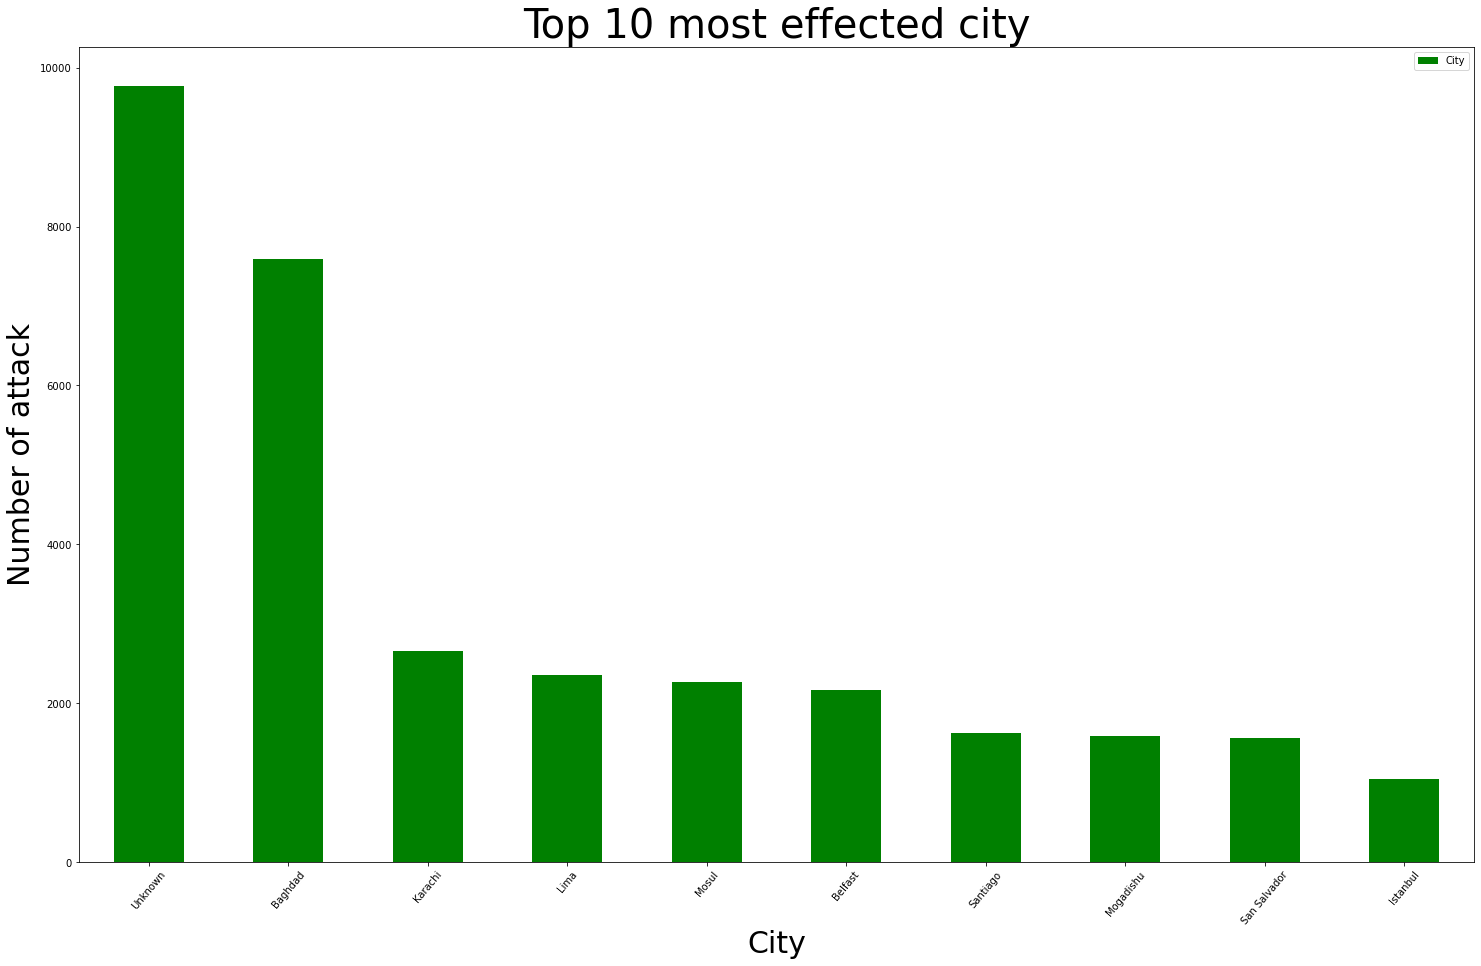

In [100]:
gtr['City'].value_counts().to_frame().sort_values('City',axis=0,ascending=False).head(10).plot(kind='bar',figsize=(25,15),color="green")
plt.xticks(rotation = 50)
plt.xlabel("City",fontsize=30)
plt.ylabel("Number of attack",fontsize=30)
plt.title("Top 10 most effected city",fontsize=40)
plt.show()

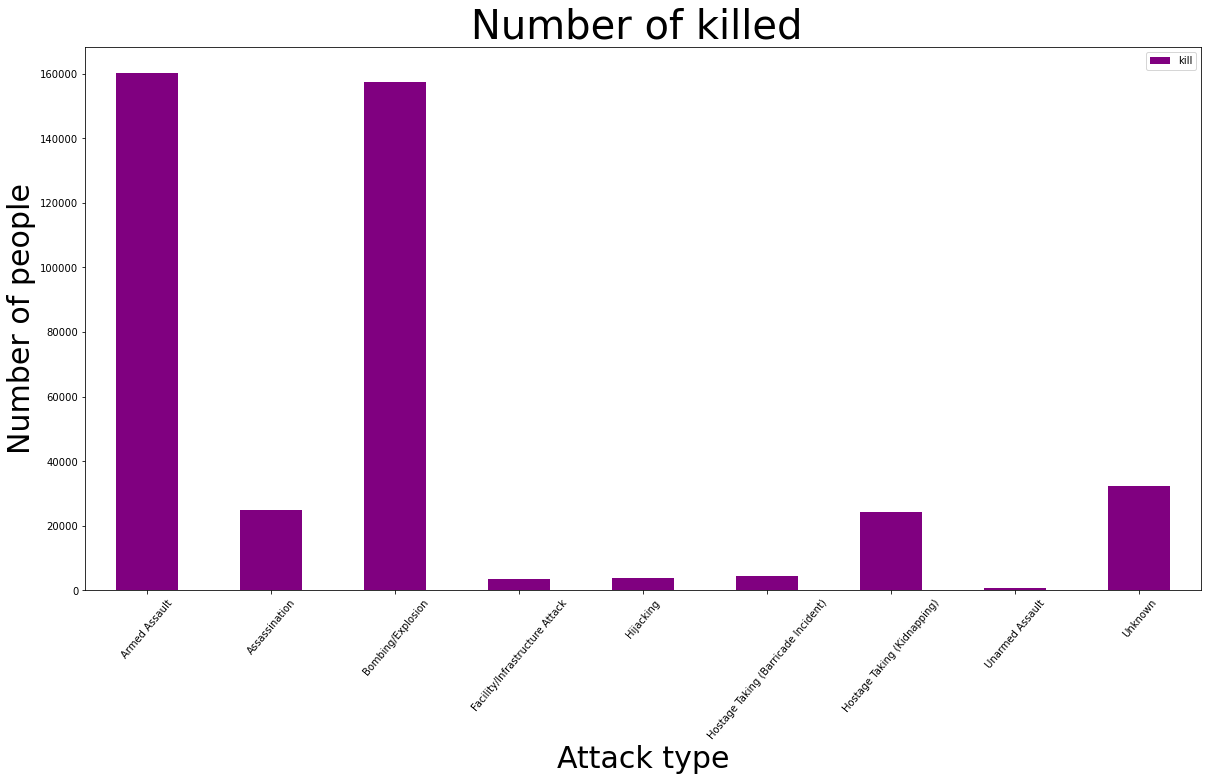

In [108]:
gtr[['Attacktype','kill']].groupby(["Attacktype"],axis=0).sum().plot(kind='bar',figsize=(20,10),color="purple")
plt.xticks(rotation=50)
plt.title("Number of killed ",fontsize=40)
plt.ylabel('Number of people',fontsize=30)
plt.xlabel('Attack type',fontsize=30)
plt.show()

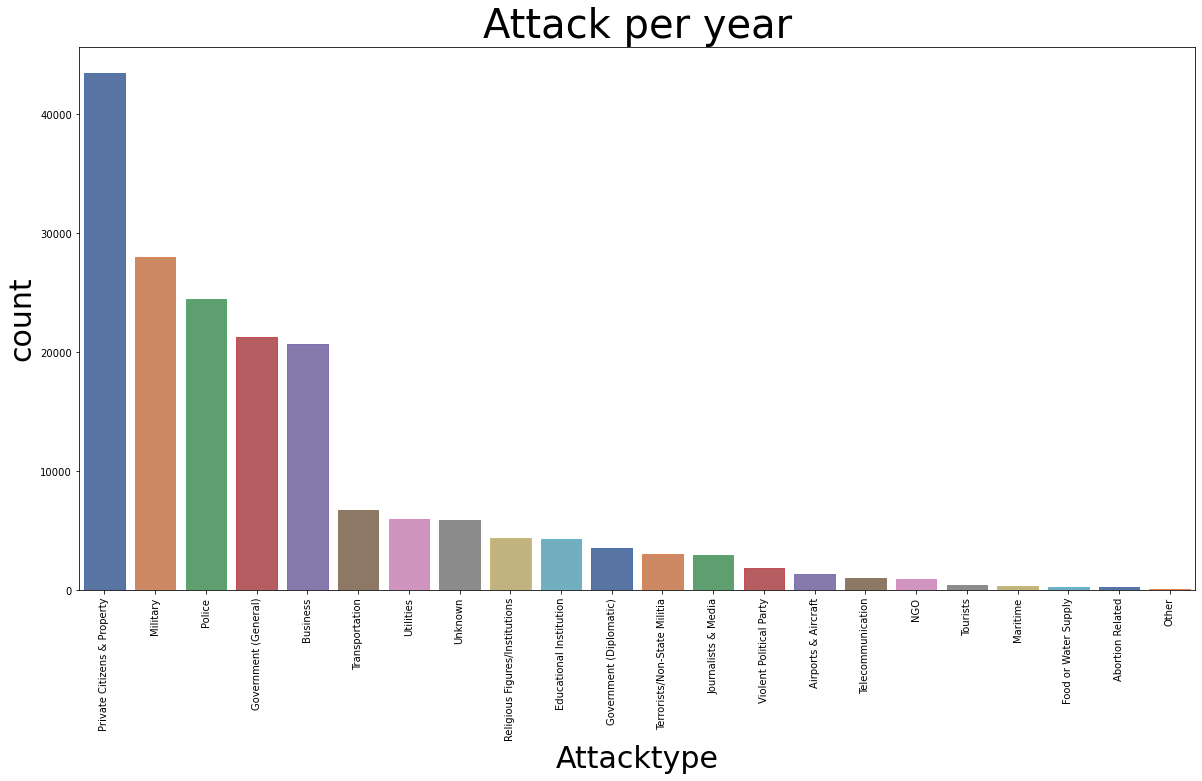

In [110]:
plt.subplots(figsize=(20,10))
sns.countplot(gtr["Targettype"],order=gtr['Targettype'].value_counts().index,palette="deep",edgecolor=sns.color_palette("deep"));
plt.xticks(rotation=90)
plt.xlabel("Attacktype",fontsize=30)
plt.ylabel("count",fontsize=30)
plt.title("Attack per year",fontsize=40)
plt.show()

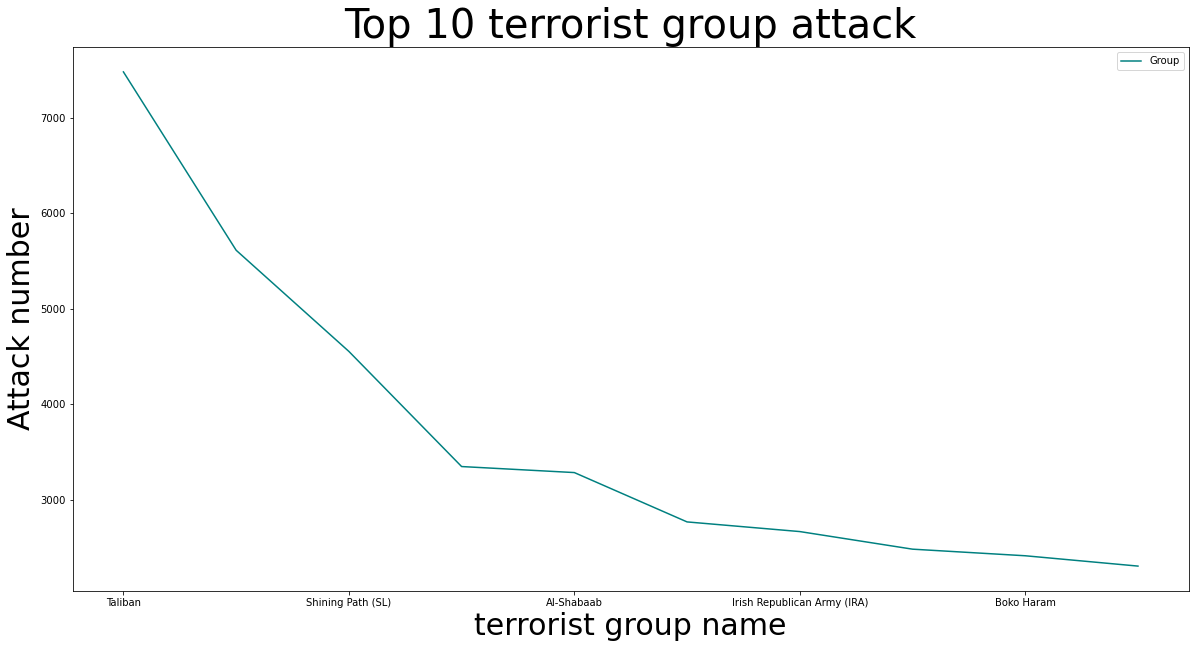

In [114]:
gtr['Group'].value_counts().to_frame().drop('Unknown').head(10).plot(kind='line',color='Teal',figsize=(20,10))
plt.title("Top 10 terrorist group attack",fontsize=40)
plt.xlabel("terrorist group name",fontsize=30)
plt.ylabel("Attack number",fontsize=30)
plt.show()

In [115]:
gtr=gtr[['Group','Country','kill']]
gtr=gtr.groupby(['Group','Country'],axis=0).sum().sort_values('kill',ascending=False).drop('Unknown').reset_index().head(10)
gtr

,Group,Country,kill
0,Islamic State of Iraq and the Levant (ISIL),Iraq,31058.0
1,Taliban,Afghanistan,29269.0
2,Boko Haram,Nigeria,16917.0
3,Shining Path (SL),Peru,11595.0
4,Liberation Tigers of Tamil Eelam (LTTE),Sri Lanka,10928.0
5,Al-Shabaab,Somalia,8176.0
6,Farabundo Marti National Liberation Front (FMLN),El Salvador,8019.0
7,Islamic State of Iraq and the Levant (ISIL),Syria,6883.0
8,Nicaraguan Democratic Force (FDN),Nicaragua,6630.0
9,Tehrik-i-Taliban Pakistan (TTP),Pakistan,6014.0


# CONCLUSION


The Country which is mostly attacked is Iraq.



Most attacked city is Baghdad which is located in the country Iraq.







The Region with the most attacks are Middle East & North Africa.

Most attacks took place in the year 2014.

Taliban is the group with most attacks